1/1 [==============================] - 1s 953ms/step


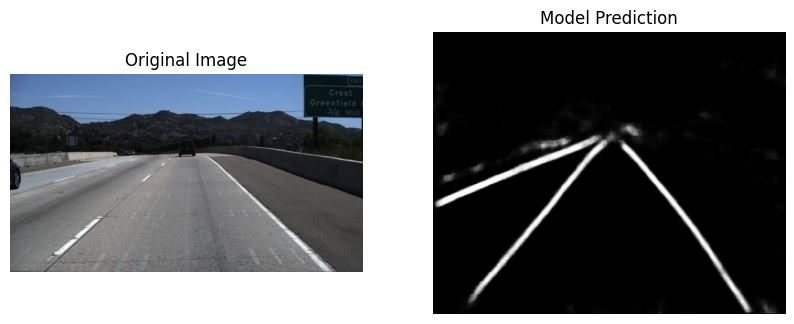

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

# Load the saved model
loaded_model = load_model('FCN.h5')

# Function to preprocess and predict on a single image
def predict_on_image(model, img_path):
    img = image.load_img(img_path, target_size=(256, 320))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    prediction = model.predict(img_array)

    return prediction[0]

# Test the model on a new image
new_image_path = '18.jpg'
prediction_result = predict_on_image(loaded_model, new_image_path)

# Visualize the input image and the model's prediction
plt.figure(figsize=(10, 5))

# Display the original image
plt.subplot(1, 2, 1)
img = image.load_img(new_image_path)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Display the model's prediction
plt.subplot(1, 2, 2)
plt.imshow(prediction_result.squeeze(), cmap='gray')
plt.title('Model Prediction')
plt.axis('off')

plt.show()
